# Evaluate effect of the numbers of keys per class in the memory module

In [1]:
#%qtconsole
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
results = []
for filename in os.listdir("results/"):
    with open("results/" + filename, 'rb') as f:
        results.append(pickle.load(f))

UnpicklingError: invalid load key, '\x00'.

In [3]:
# print final validation accuracy for each number_of_keys_per_class
keys = []
val_acc = []
acc = []
loss = []
val_loss = []
for i in range(len(results)):
    n_keys = 50 + 50*i
    keys.append(n_keys)
    val_acc_i = results[i][0][-1]
    val_acc.append(val_acc_i)
    acc_i = results[i][1][-1]
    acc.append(acc_i)
    loss_i = results[i][2][-1]
    loss.append(loss_i)
    val_loss_i = results[i][3][-1]
    val_loss.append(val_loss_i)

[]

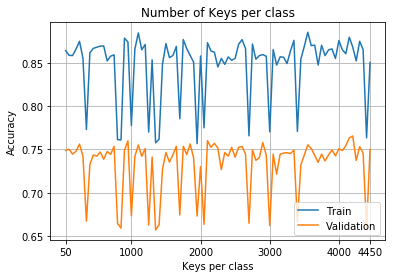

In [22]:
plt.plot(keys, acc)
plt.plot(keys, val_acc)
plt.title('Number of Keys per class')
plt.ylabel('Accuracy')
plt.xlabel('Keys per class')
plt.xticks([50, 1000, 2000, 3000, 4000, 4450])
plt.grid()
plt.legend(['Train', 'Validation'])
plt.savefig('keys_per_class.pdf')
plt.plot()

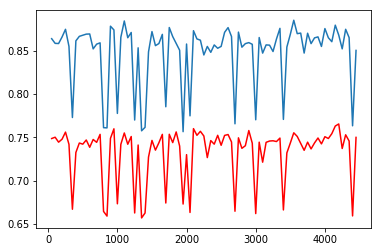

In [5]:
plt.plot(keys, acc)
plt.plot(keys, val_acc, c='r')

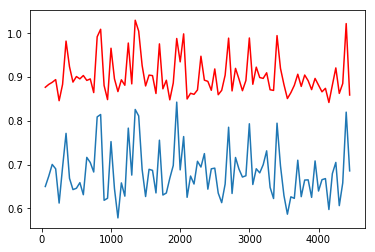

In [6]:
plt.plot(keys, loss)
plt.plot(keys, val_loss, c='r')

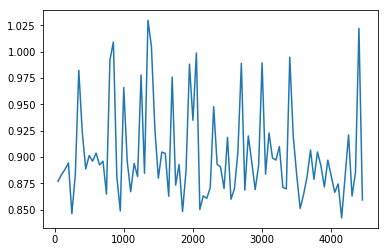

In [7]:
plt.plot(keys, val_loss)

# Explore distribution of the keys in the memory module of the network

In [24]:
import numpy as np
import pickle

In [25]:
results = []
for filename in os.listdir("results/results1/"):
    with open("results/results1/" + filename, 'rb') as f:
        results.append(pickle.load(f))

(1400, 20)


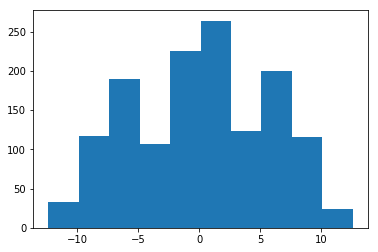

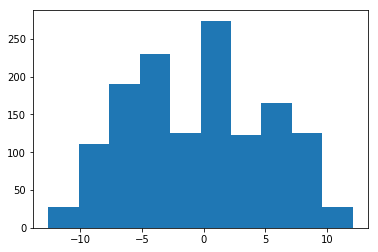

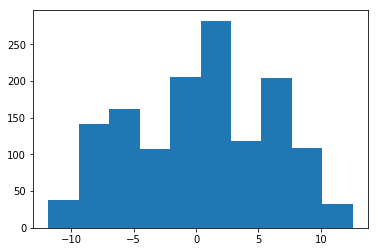

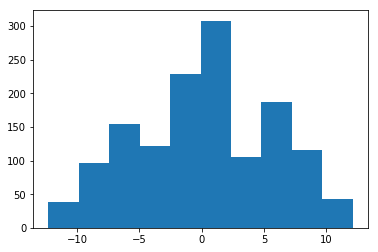

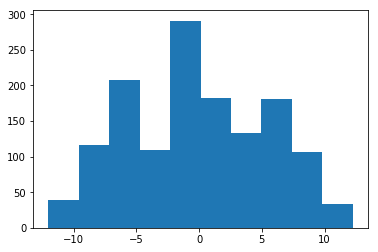

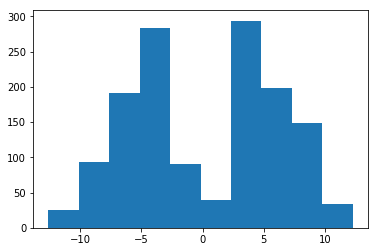

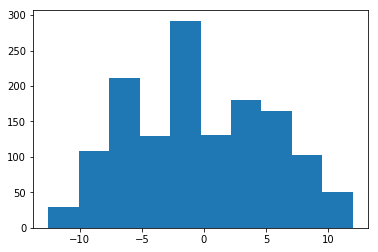

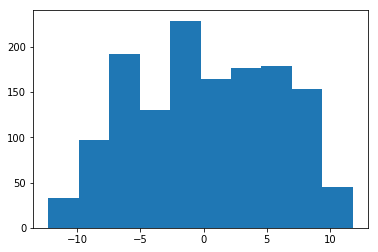

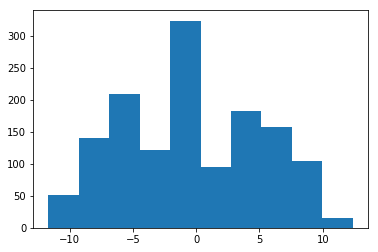

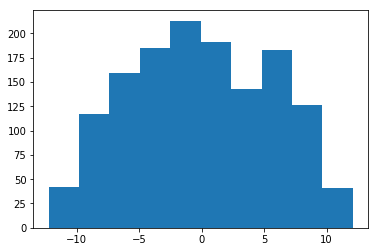

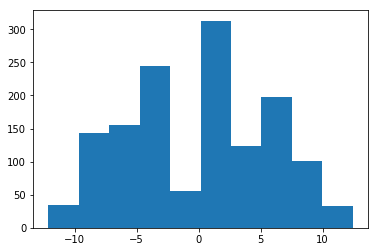

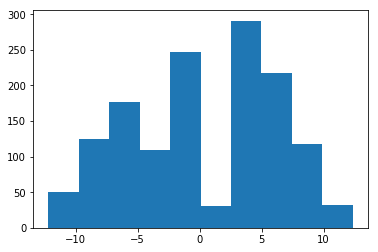

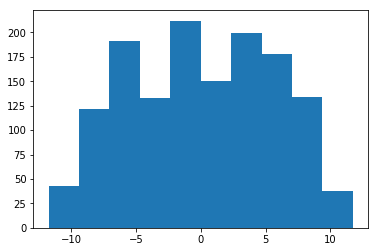

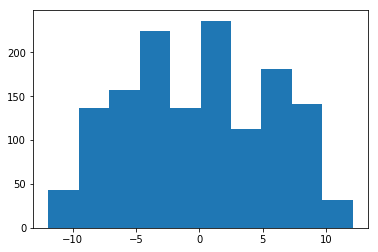

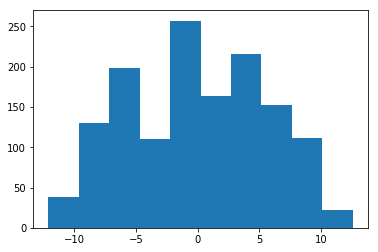

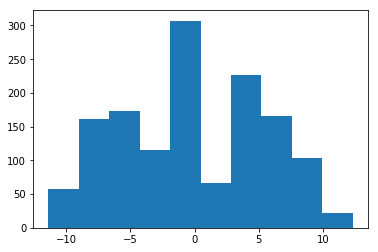

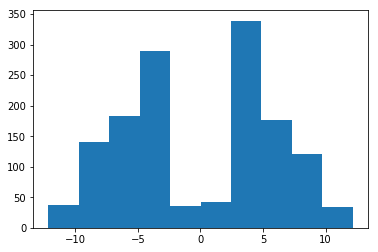

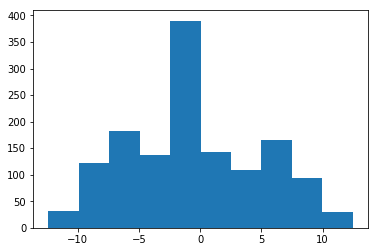

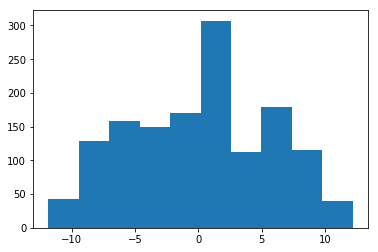

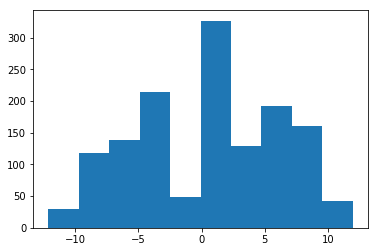

In [41]:
# results[0] = first file in the directory
# results[0][-1] = all weights (via get_weights()) from that file
# results[0][-1][-1] = the weights in the last layer of that network (i.e. the memory module)
print(results[0][-1][-1].shape) # should be (number of keys per class * number of categories X embedding size)

for i in range(len(results[:1])):
    #print(results[i][-1][-1].shape)
    for dim in results[i][-1][-1].T:
        plt.hist(dim)
        plt.show()
    #mean_embeddings = np.mean(results[i][-1][-1], axis=0)